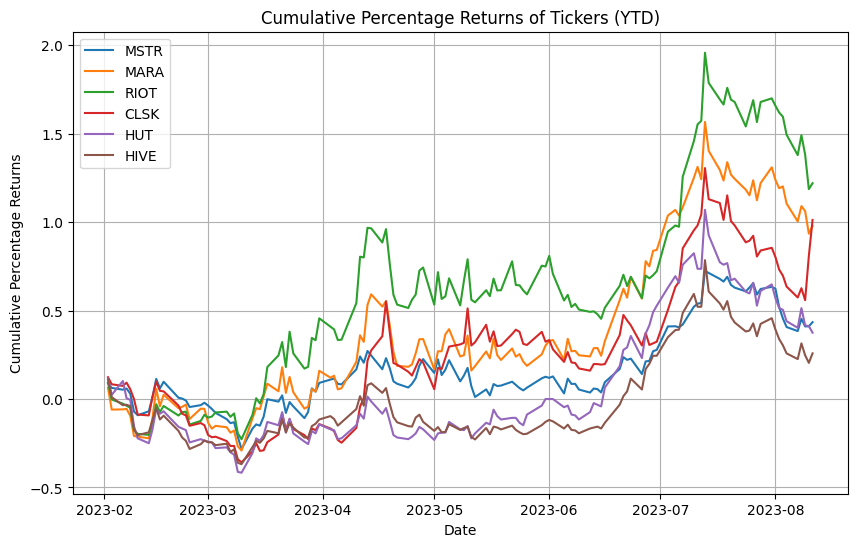

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pandas as pd

today = datetime.datetime.today()
year_start = datetime.datetime(today.year, 1, 1)

daily = {}
tickers = ['MSTR', 'MARA', 'RIOT', 'MSTR', 'CLSK', 'HUT', 'RIOT', 'HIVE']

for i in range(len(tickers)):
    ticker = tickers[i]
    data = yf.Ticker(ticker).history(start=year_start, interval='1d')['Close']
    daily[ticker] = data.pct_change() * 100  # Calculate percentage returns

df = pd.DataFrame(daily)

cumulative_returns = (1 + df/100).cumprod() - 1

# Plotting the data
plt.figure(figsize=(10, 6))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.xlabel('Date')
plt.ylabel('Cumulative Percentage Returns')
plt.title('Cumulative Percentage Returns of Tickers (YTD)')
plt.legend()
plt.grid(True)
plt.show()
